In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [ ]:
df.nunique()

Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
# colums to list
columns = df.columns.to_list()
columns

['Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
df.select_dtypes(include=np.number).columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000


In [ ]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [ ]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000      1
SatisfactionScore            0          0.000000     

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


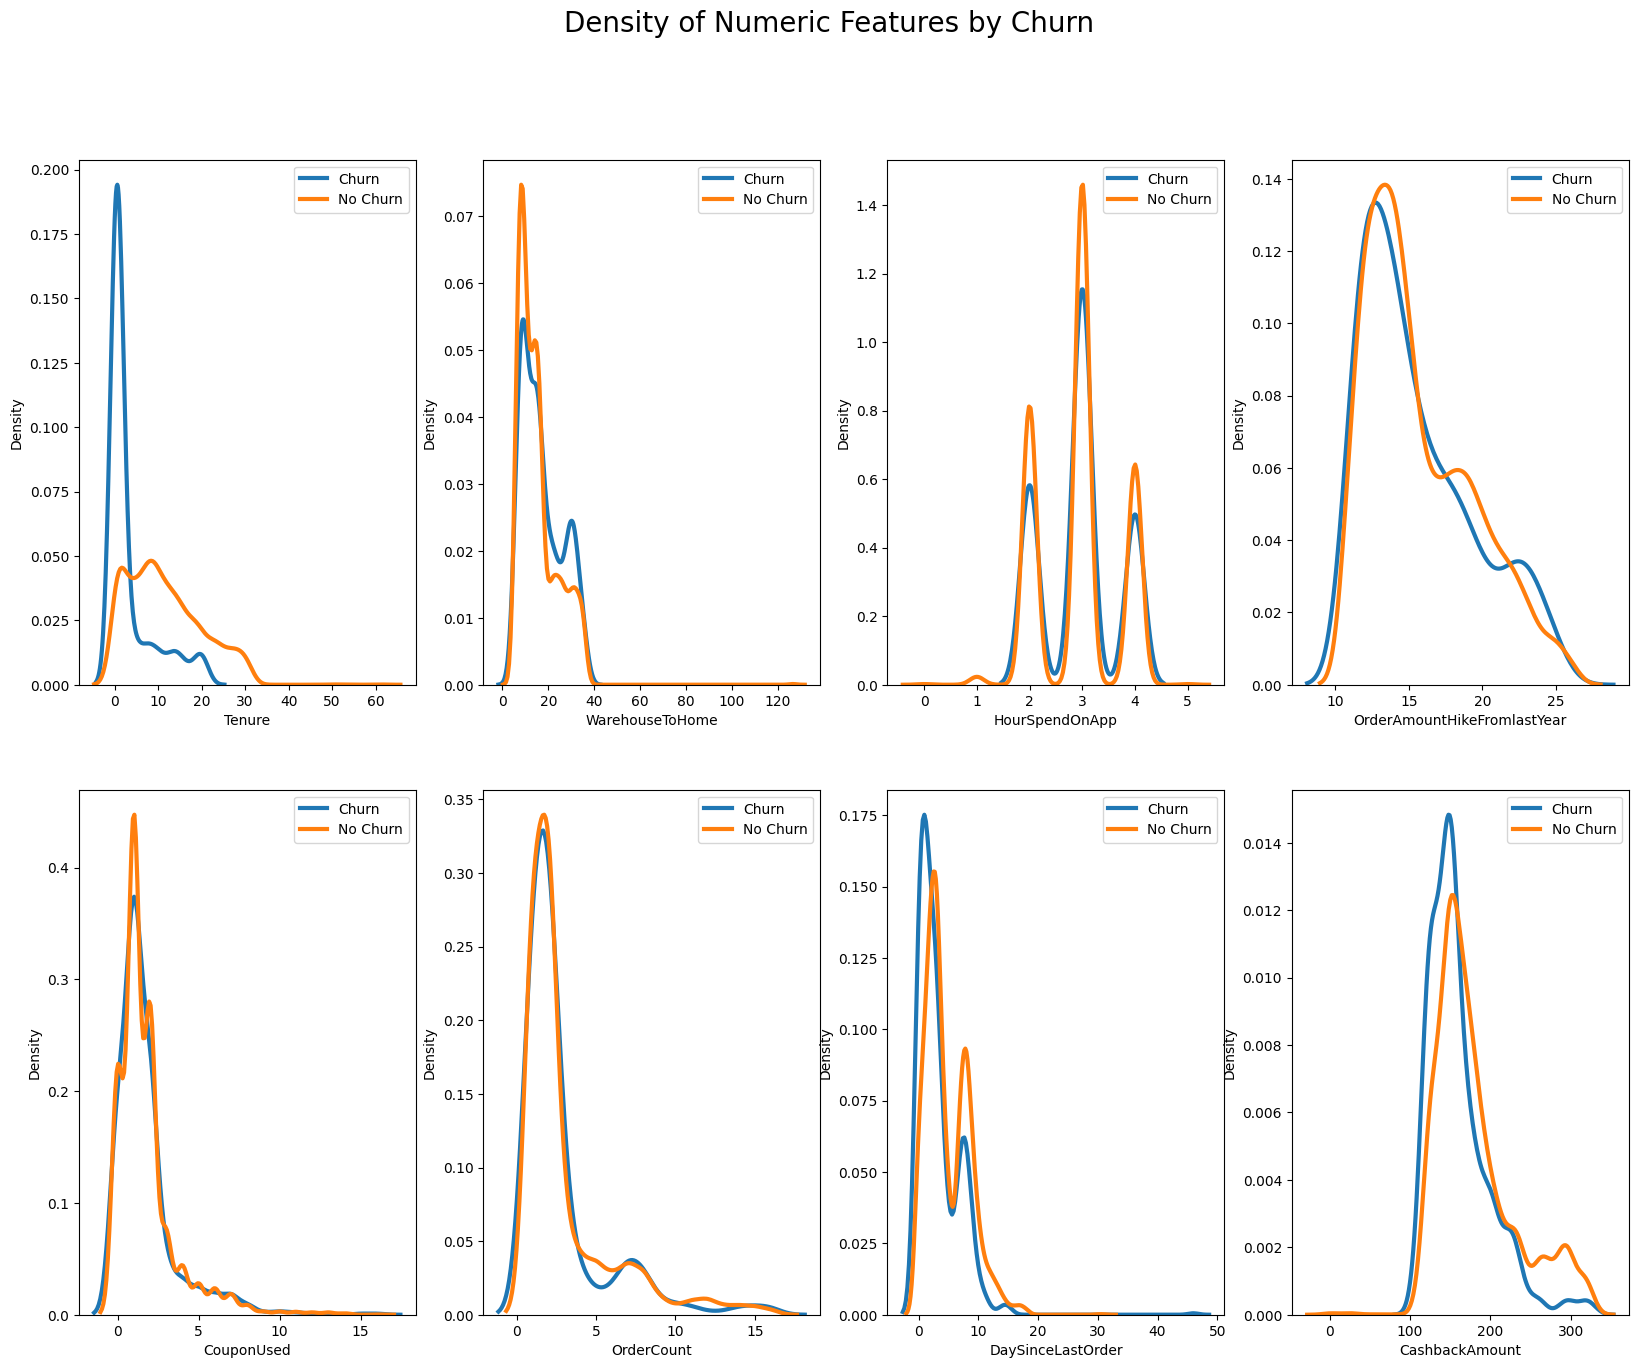

In [ ]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

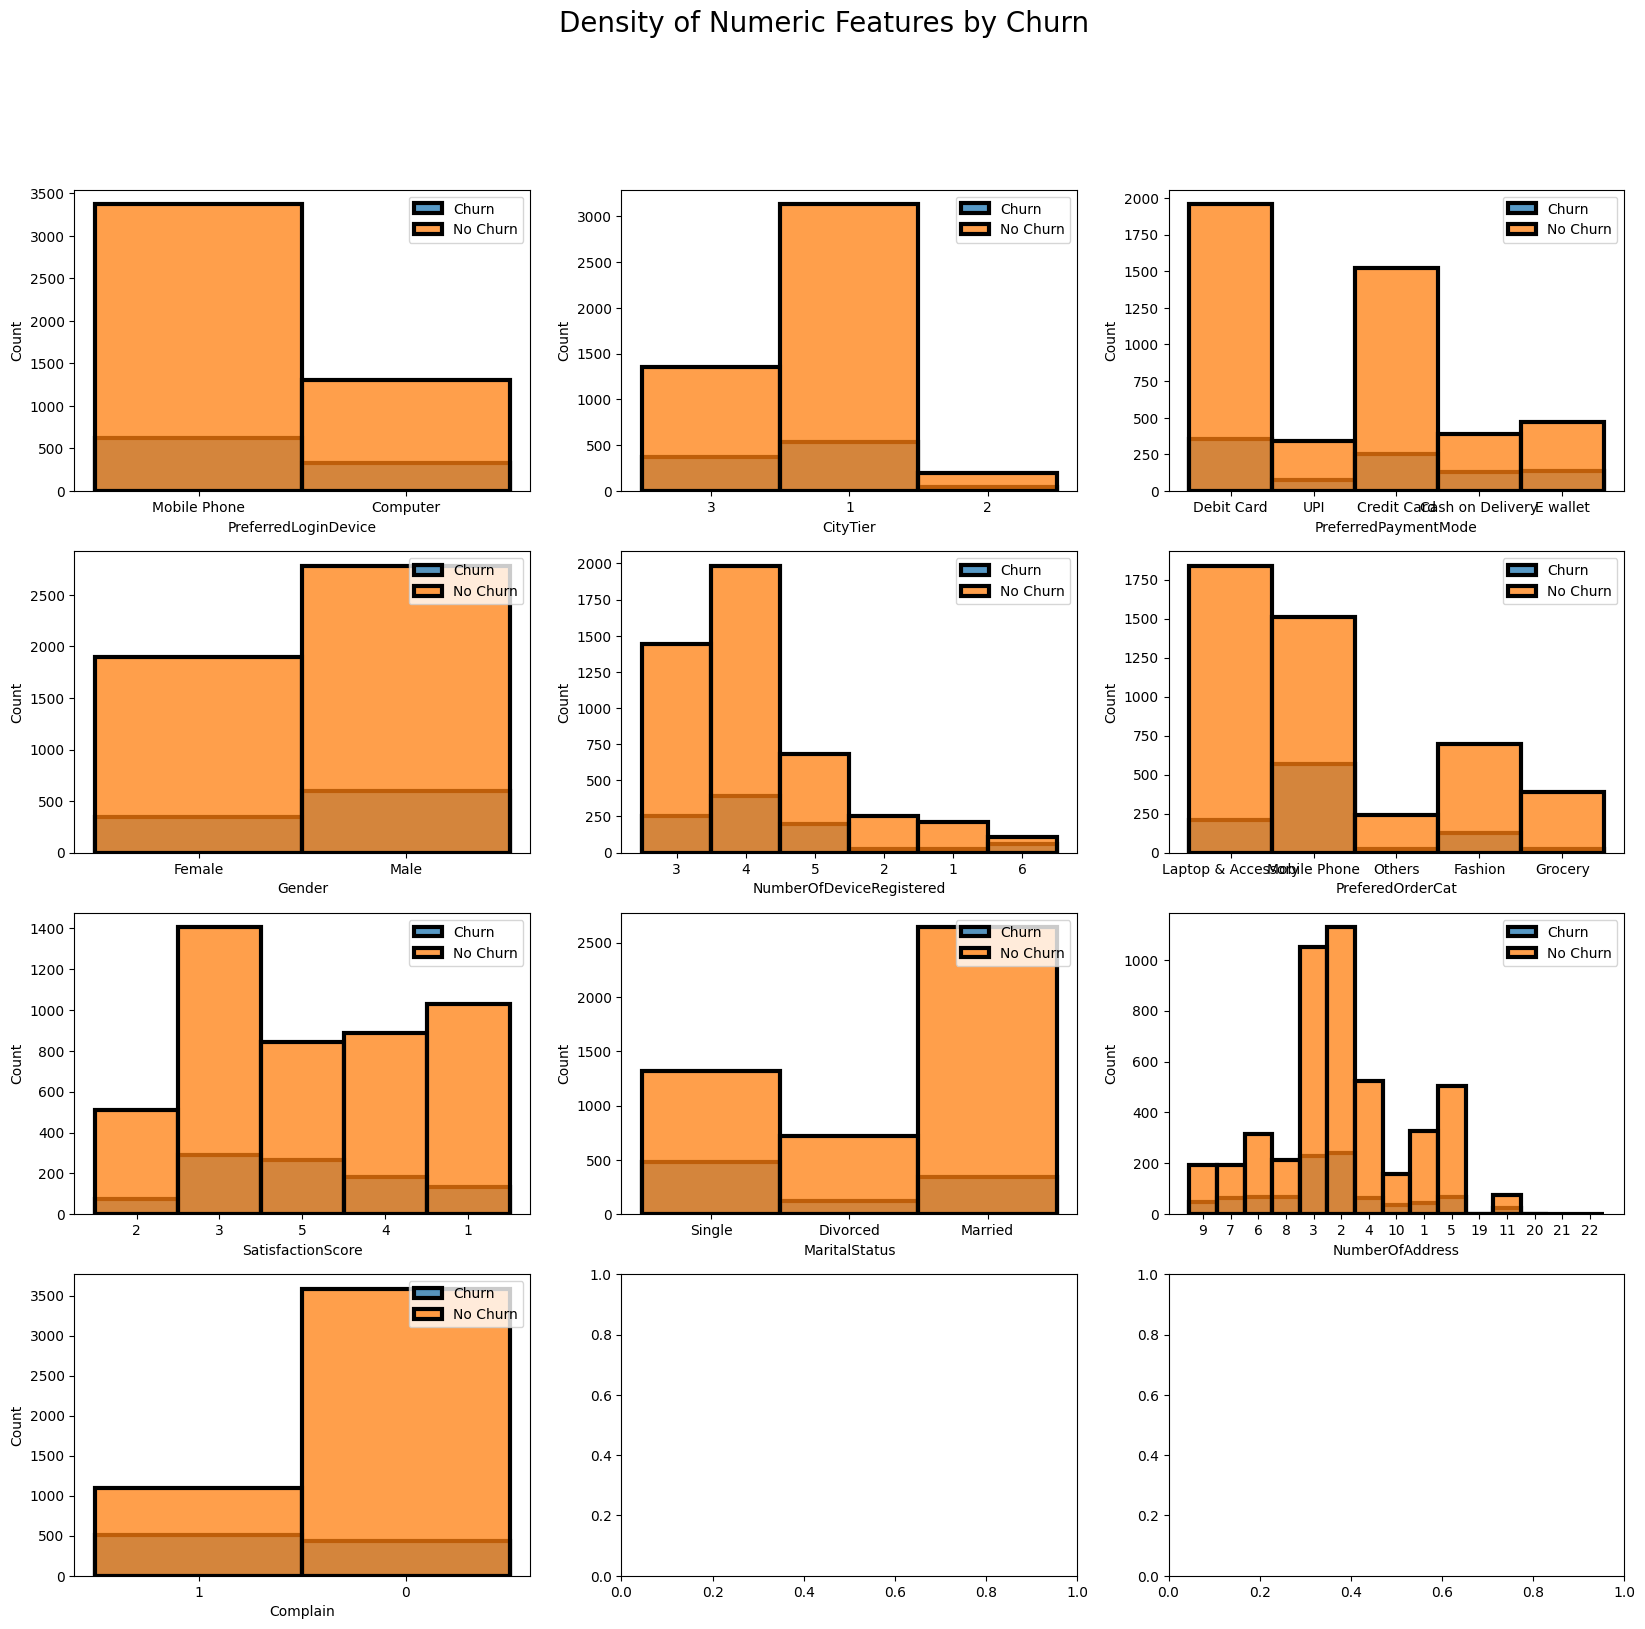

In [ ]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [ ]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [ ]:
df.groupby("Churn")["Gender"].value_counts() # the churned females ratio 348/2246 * 100
                                              # the churned males ratio 600/3384 * 100

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64

In [ ]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts() # the churned females ratio 348/2246 * 100


PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1452
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

<Axes: xlabel='Gender'>

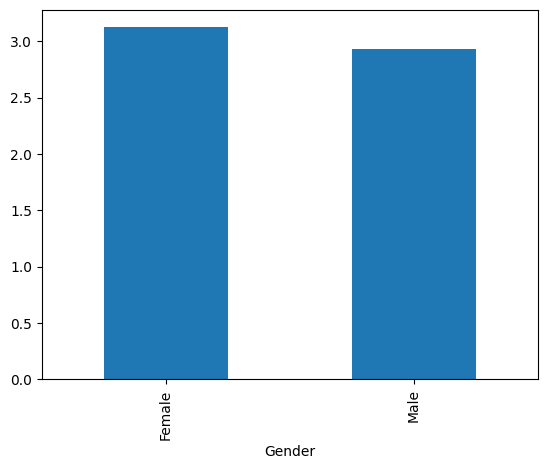

In [ ]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders  # females have more order count avg

There is not a big difference between the males and the female average order count


In [ ]:
percentageM =600/3384 * 100

percentageM   #the percentage of the leaving males out of the males

17.73049645390071

In [ ]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females


15.49421193232413

In [ ]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()


Text(0, 0.5, 'Churn Rate')

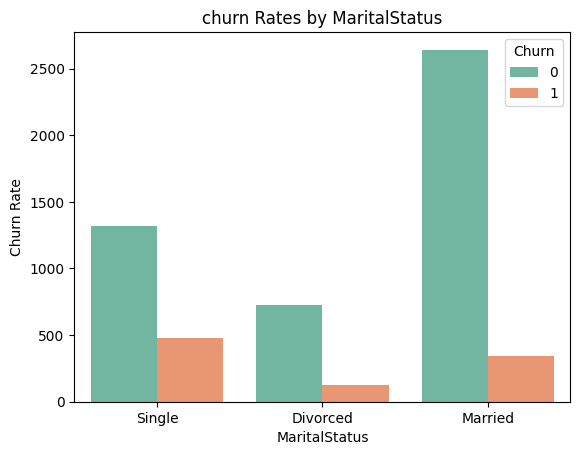

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

Singles are more likely to churn as compared to married people.


In [ ]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

,mean,max
CityTier,,
1,2.953255,16.0
2,2.584034,13.0
3,3.185185,16.0


In [ ]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

City tier 3 has the highest order average but it is not a strong factor in the customer churning


In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()



# sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=df)
# ax = df[['SatisfactionScore','HourSpendOnApp']].value_counts().plot(kind='bar')


as we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app

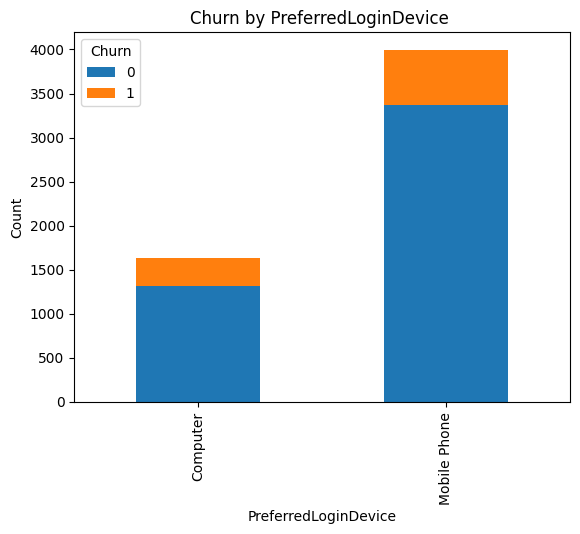

In [ ]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()


mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version


In [ ]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

Laptop and accessories and phones are the preffered catrogory for all tiers

In [ ]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()

CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
dtype: int64

In [ ]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

In [ ]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'Count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='Count',
)
fig.show()

Graph show churn becomes less whern more couppons are used

In [ ]:
# fig = px.density_contour(df2, x="HourSpendOnApp", y="OrderCount", color = 'churn',
#                          title="<b>"+'HourSpendOnApp Vs OrderCount within churn',
#                           color_discrete_sequence=["#d62728", "#1f77b4"]
#                         )
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

There seems to be a poitive relation between cashback amount and churn rate

**bold text**Data Preprocessing

In [ ]:
round((df.isnull().sum()*100 / df.shape[0]),2)

Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [ ]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

In [ ]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

In [ ]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

In [ ]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

In [ ]:
df.head

<bound method NDFrame.head of       Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     0.0         Mobile Phone         1              8.0   
2         1     0.0         Mobile Phone         1             30.0   
3         1     0.0         Mobile Phone         3             15.0   
4         1     0.0         Mobile Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4             Credit Card    Male             3.0                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1           Mobile Phone                  3        Single                7   
2           Mobile Phone                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4           Mobile Phone                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0          159.93  
1                   0.0          120.90  
2                   3.0          120.28  
3                   3.0          134.07  
4                   3.0          129.60  
...                 ...             ...  
5625                4.0          150.71  
5626                4.0          224.91  


In [ ]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64
****************************************
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
****************************************


In [ ]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
le = LabelEncoder()

In [ ]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [ ]:
# Handling outliers
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [ ]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.335747,-0.040603,0.069468,0.054387,-0.005262,0.038745,0.000969,0.079562,0.104850,0.108673,0.132155,0.034269,0.251844,-0.001993,-0.017509,-0.036282,-0.163984,-0.164663
Tenure,-0.335747,1.000000,0.034244,-0.065856,-0.011629,-0.016744,-0.054984,-0.011549,-0.019813,-0.180482,-0.013344,-0.111148,0.240716,-0.023543,0.016884,0.127119,0.181007,0.164187,0.453853
PreferredLoginDevice,-0.040603,0.034244,1.000000,0.010212,-0.015568,0.009685,-0.013267,0.022963,-0.005606,0.005388,0.037637,-0.020288,0.032942,0.006465,-0.005685,-0.016235,-0.022195,-0.028317,0.042027
CityTier,0.069468,-0.065856,0.010212,1.000000,0.014569,0.251526,-0.022675,-0.006903,0.007349,-0.164113,-0.009732,0.002272,-0.033278,0.006199,-0.022047,0.017210,0.035709,0.023493,0.045024
WarehouseToHome,0.054387,-0.011629,-0.015568,0.014569,1.000000,0.008003,-0.015683,0.079040,0.029226,-0.114527,0.013793,-0.028183,0.001406,0.021767,0.029170,0.013355,0.016367,0.045139,0.036513
PreferredPaymentMode,-0.005262,-0.016744,0.009685,0.251526,0.008003,1.000000,0.020145,-0.006880,0.012952,-0.030778,-0.018083,-0.024147,0.003281,0.028222,-0.000210,-0.008539,-0.039219,-0.003520,0.034432
Gender,0.038745,-0.054984,-0.013267,-0.022675,-0.015683,0.020145,1.000000,-0.012846,-0.021178,0.061177,-0.037364,-0.020037,-0.030883,-0.029988,-0.007999,-0.026710,-0.031270,-0.027915,-0.024558
HourSpendOnApp,0.000969,-0.011549,0.022963,-0.006903,0.079040,-0.006880,-0.012846,1.000000,0.268338,0.030277,0.027696,-0.047336,0.133939,-0.001381,0.100624,0.181292,0.106152,0.081325,0.114291
NumberOfDeviceRegistered,0.079562,-0.019813,-0.005606,0.007349,0.029226,0.012952,-0.021178,0.268338,1.000000,-0.011374,-0.001050,0.037396,0.070874,-0.001772,0.061072,0.135825,0.092372,0.025823,0.119869
PreferedOrderCat,0.104850,-0.180482,0.005388,-0.164113,-0.114527,-0.030778,0.061177,0.030277,-0.011374,1.000000,-0.002719,0.042473,-0.096232,-0.000592,0.001698,-0.152934,-0.179553,-0.235459,-0.340882


<Axes: >

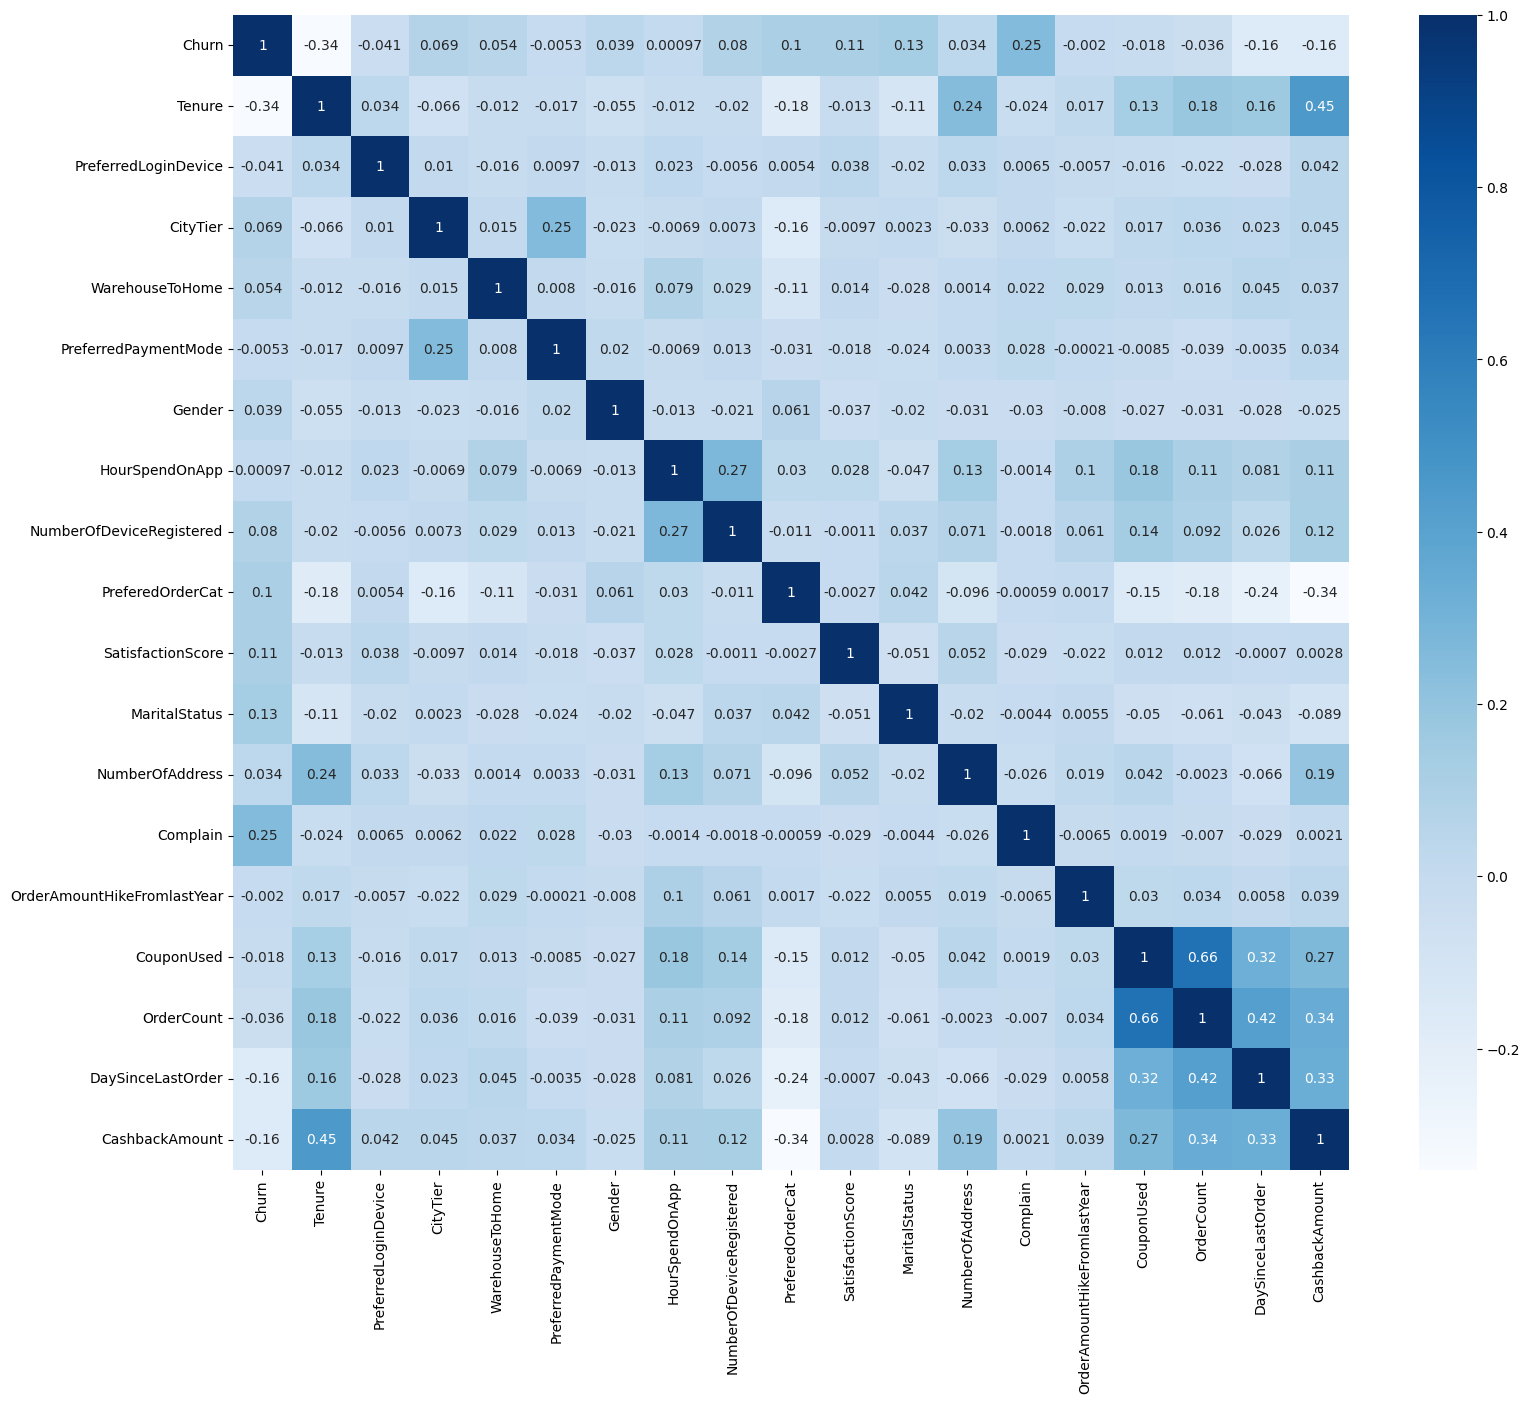

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.251844
MaritalStatus                  0.132155
SatisfactionScore              0.108673
PreferedOrderCat               0.104850
NumberOfDeviceRegistered       0.079562
CityTier                       0.069468
WarehouseToHome                0.054387
Gender                         0.038745
NumberOfAddress                0.034269
HourSpendOnApp                 0.000969
OrderAmountHikeFromlastYear   -0.001993
PreferredPaymentMode          -0.005262
CouponUsed                    -0.017509
OrderCount                    -0.036282
PreferredLoginDevice          -0.040603
DaySinceLastOrder             -0.163984
CashbackAmount                -0.164663
Tenure                        -0.335747
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

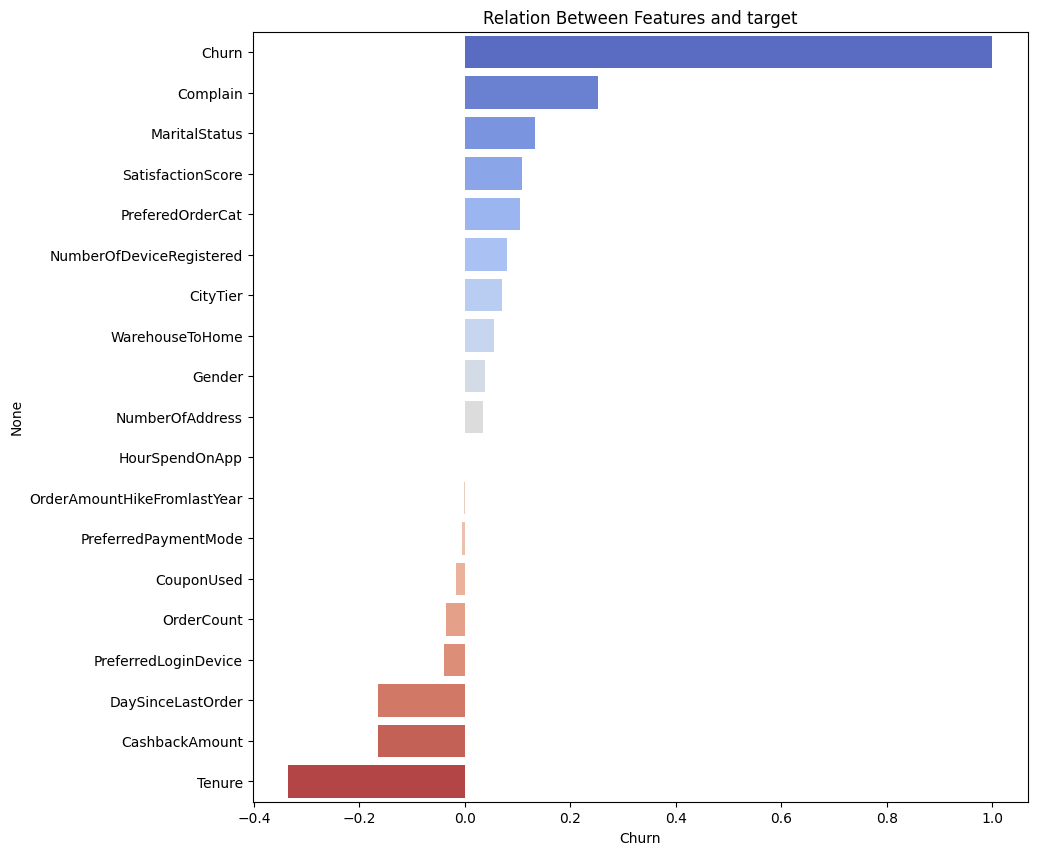

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [ ]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

#### Our Data Imbalanced so lets make Over sample for it Using SMOTETomek

In [ ]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)
x_over.shape, y_over.shape

((8584, 18), (8584,))

In [ ]:
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,1,1,12.0,1,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,0,1,30.0,1,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,13.0,1,1,13.0,1,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,4.0,224.91
5627,1.0,1,1,11.0,2,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,23.0,0,3,9.0,1,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")


logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [ ]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7693075898801598
Test Score: 0.7736801242236024
Acc Train: 0.7693075898801598
Acc Test: 0.7736801242236024
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9076231691078562
Test Score: 0.8765527950310559
Acc Train: 0.9076231691078562
Acc Test: 0.8765527950310559
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9320652173913043
Acc Train: 1.0
Acc Test: 0.9320652173913043
                                                            
************************************************************
                                                            
Using m

In [ ]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.769308,0.773680
Support Vector Machine,0.907623,0.876553
Decision Tree,1.000000,0.932065
Random Forest,1.000000,0.967391
XGBClassifier,1.000000,0.954193
AdaBoostClassifier,0.877663,0.828804


In [ ]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7736801242236024
ROC Area under Curve = 0.7740920257418878
              precision    recall  f1-score   support

           0    0.80168   0.73328   0.76596      1301
           1    0.74964   0.81490   0.78091      1275

    accuracy                        0.77368      2576
   macro avg    0.77566   0.77409   0.77343      2576
weighted avg    0.77592   0.77368   0.77336      2576

**********************************************************************


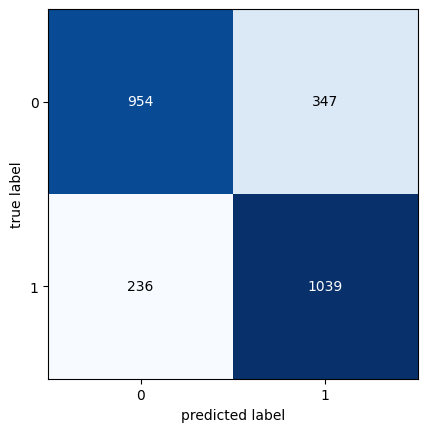

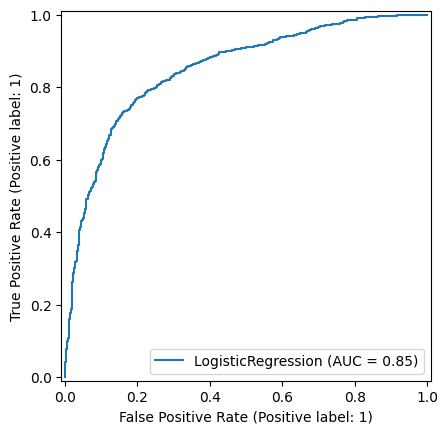

In [ ]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9289596273291926
ROC Area under Curve = 0.9291522358366867
              precision    recall  f1-score   support

           0    0.94720   0.91007   0.92826      1301
           1    0.91176   0.94824   0.92964      1275

    accuracy                        0.92896      2576
   macro avg    0.92948   0.92915   0.92895      2576
weighted avg    0.92966   0.92896   0.92895      2576



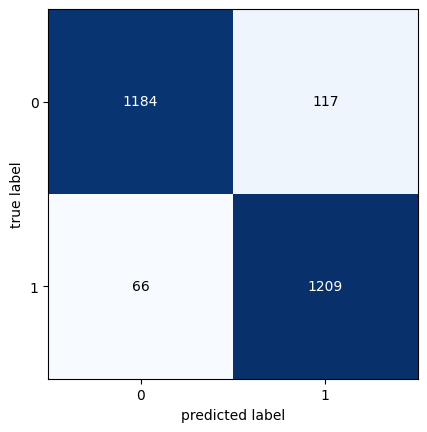

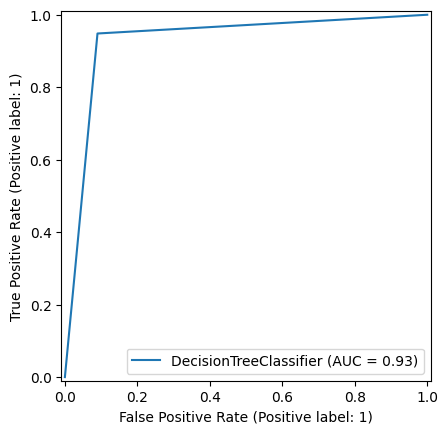

In [ ]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9541925465838509
ROC Area under Curve = 0.9545875721541499
              precision    recall  f1-score   support

           0    0.99333   0.91545   0.95280      1301
           1    0.92012   0.99373   0.95551      1275

    accuracy                        0.95419      2576
   macro avg    0.95672   0.95459   0.95415      2576
weighted avg    0.95709   0.95419   0.95414      2576



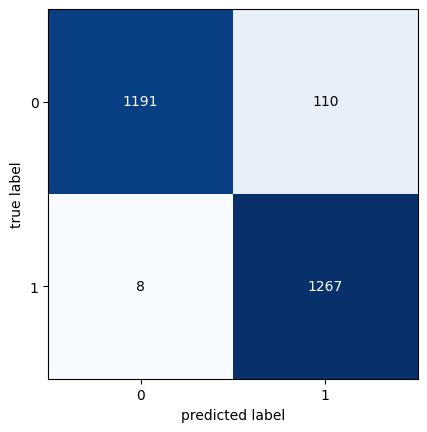

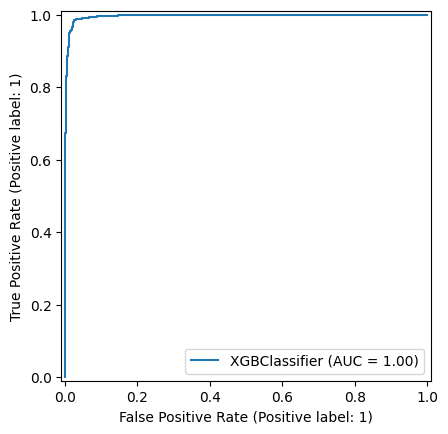

In [ ]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
# init setup
model_setup = setup(df , target = 'Churn' , train_size=0.7)


,Description,Value
0,Session id,5737
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5154, 19)"
4,Transformed data shape,"(5154, 19)"
5,Transformed train set shape,"(3607, 19)"
6,Transformed test set shape,"(1547, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9587,0.9773,0.8392,0.9073,0.8708,0.8463,0.8480,0.1350
lightgbm,Light Gradient Boosting Machine,0.9543,0.9761,0.8094,0.9084,0.8549,0.8279,0.8306,0.7030
rf,Random Forest Classifier,0.9523,0.9794,0.7862,0.9169,0.8456,0.8177,0.8216,0.9350
et,Extra Trees Classifier,0.9509,0.9876,0.7613,0.9335,0.8372,0.8088,0.8155,0.5290
dt,Decision Tree Classifier,0.9312,0.8720,0.7829,0.8017,0.7907,0.7496,0.7507,0.0980
gbc,Gradient Boosting Classifier,0.9143,0.9321,0.6303,0.8128,0.7056,0.6571,0.6667,1.0570
ada,Ada Boost Classifier,0.8861,0.9044,0.5392,0.7114,0.6109,0.5460,0.5545,0.5550
lr,Logistic Regression,0.8730,0.8584,0.4163,0.7088,0.5198,0.4531,0.4765,1.4030
lda,Linear Discriminant Analysis,0.8714,0.8521,0.4130,0.6986,0.5157,0.4476,0.4697,0.1520
ridge,Ridge Classifier,0.8603,0.0000,0.1824,0.9090,0.3024,0.2617,0.3689,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier),
    ('XGBoost', xgb_classifier)
], voting='hard')


In [ ]:
ensemble_model.fit(x_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9817546583850931
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1301
           1       0.97      0.99      0.98      1275

    accuracy                           0.98      2576
   macro avg       0.98      0.98      0.98      2576
weighted avg       0.98      0.98      0.98      2576



In [ ]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('CustomerChurn.pkl')
print(projectabspathname)
projectname = 'Customer churn final.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()


/content/CustomerChurn.pkl
